In [3]:
# date >> 11 jan 2025

In [4]:
import numpy as np
import pandas as pd
np.random.seed(1)

In [5]:
no_of_samples = 1000
class_0_ratio = 0.9
class_1_ratio = 0.1
no_class_0 = int(class_0_ratio*no_of_samples)
no_class_1 = 100

In [6]:
no_class_1

100

In [7]:
no_class_0

900

In [8]:
class_0 = {'feature1':np.random.normal(0,1,no_class_0),
           'feature2':np.random.normal(0,1,no_class_0),
           'target' : [0]*no_class_0
           }

In [9]:
class_0 = pd.DataFrame(class_0)

In [10]:
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [11]:
class_1 = {
    'feature1':np.random.normal(3,1,no_class_1),
    'feature2':np.random.normal(3,1,no_class_1),
    'target':[1]*no_class_1
}

In [12]:
class_1 = pd.DataFrame(class_1)

In [13]:
class_1

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [14]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [15]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [16]:
df.sample(15)

,feature1,feature2,target
273,0.884909,1.294182,0
439,1.789755,-0.070950,0
593,1.710662,-0.148941,0
324,0.621083,1.040038,0
875,0.650323,0.251860,0
826,0.572963,-1.181063,0
900,1.692029,3.933630,1
840,1.495885,0.334915,0
625,0.189862,-0.361404,0
975,2.427974,4.613562,1


In [17]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [18]:
# up sampling

In [19]:
df_majority = df[df['target']==0]

In [20]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [21]:
df_minority = df[df['target'] == 1]

In [22]:
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [23]:
from sklearn.utils import resample

In [24]:
df_minoirty_upsampled = resample(df_minority,replace=True, n_samples=900, random_state=1)

In [25]:
df_minoirty_upsampled

,feature1,feature2,target
937,2.253776,1.681477,1
912,2.448320,2.898619,1
972,2.541698,2.700847,1
909,1.724886,1.748043,1
975,2.427974,4.613562,1
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [26]:
df_upsampled = pd.concat([df_majority,df_minoirty_upsampled]).reset_index(drop=True)

In [27]:
df_upsampled

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
1795,4.093307,2.373543,1
1796,4.138173,3.647375,1
1797,4.472396,1.236225,1
1798,1.965537,4.084419,1


In [28]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [29]:
# DOWN SAMPLING


In [30]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [31]:
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [32]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=100,random_state=1)

In [33]:
df_majority_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [34]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled]).reset_index(drop=True)

In [35]:
df_downsampled

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
195,-1.579156,2.711950,0
196,-1.044589,0.522655,0
197,0.410266,0.683356,0
198,-1.114871,-0.800787,0


In [36]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [37]:
# SMOTE

In [38]:
from sklearn.datasets import make_classification

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification

In [40]:
x,y = make_classification(n_samples=1000,n_redundant = 0,n_features=2, n_clusters_per_class=1,weights=[0.9],random_state=1 )

In [41]:

# Let’s break down the make_classification function and the arguments you provided:

# Function Overview:
# make_classification is a utility function in the sklearn.datasets module. It is used to generate a synthetic dataset for classification tasks. The generated data consists of feature values (X) and their corresponding target labels (y).

# Parameters in Your Code:
# n_samples=1000:

# Specifies the number of samples (data points) to generate.
# In this case, 1000 samples are generated.
# n_features=2:

# Specifies the total number of features (columns) in the dataset.
# Each sample will have 2 features (or dimensions) that determine its position in the feature space.
# n_redundant=0:

# Specifies the number of redundant features to create.
# Redundant features are linear combinations of informative features.
# Here, you have 0 redundant features, meaning all the features are informative.
# n_clusters_per_class=1:

# Defines the number of clusters to create per class in the dataset.
# Each class will have data grouped into one cluster.
# weights=[0.9]:

# Specifies the proportions of each class in the target labels (y).
# [0.9] means that 90% of the samples will belong to one class (the majority class), and the remaining 10% will belong to the other class (the minority class).
# random_state=1:

# Ensures reproducibility of the dataset by seeding the random number generator.
# If you use the same random_state, the generated dataset will always be the same.

In [42]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [43]:
x.shape

(1000, 2)

In [44]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
len(y)

1000

In [46]:
len(y[y==1])

106

In [47]:
len(y[y==0])

894

In [48]:
df1 = pd.DataFrame(x, columns=['f1','f2'])

In [49]:
df1

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [50]:
df2 = pd.DataFrame(y, columns=['target'])

In [51]:
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [52]:
final_df = pd.concat([df1, df2], axis=1)

In [53]:
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [54]:
type(final_df)

pandas.core.frame.DataFrame

In [55]:
import matplotlib.pyplot as plt

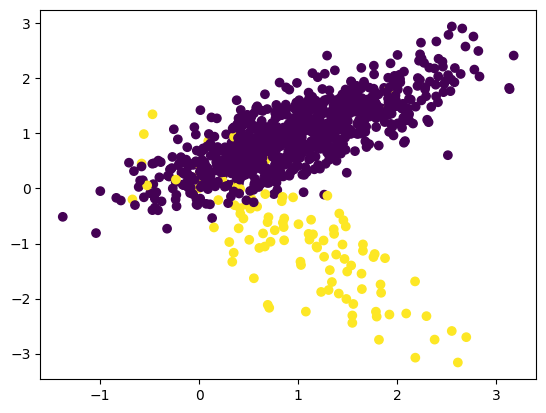

In [56]:
plt.scatter('f1','f2', data=final_df, c=final_df['target'])

In [57]:
    df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [58]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [59]:
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [60]:
df_minoirty_upsampled = resample(df_minority, replace =True, n_samples=len(df_majority),random_state=1)

In [61]:
df_minoirty_upsampled

,feature1,feature2,target
937,2.253776,1.681477,1
912,2.448320,2.898619,1
972,2.541698,2.700847,1
909,1.724886,1.748043,1
975,2.427974,4.613562,1
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [62]:
df_upsampled = pd.concat([df_minoirty_upsampled,df_majority])

In [63]:
df_upsampled

,feature1,feature2,target
937,2.253776,1.681477,1
912,2.448320,2.898619,1
972,2.541698,2.700847,1
909,1.724886,1.748043,1
975,2.427974,4.613562,1
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [64]:
df_majority_downsampled = resample(df_majority, replace=False,n_samples=len(df_minority),random_state=1)

In [65]:
df_majority_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [66]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [67]:
df_downsampled

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [68]:
from sklearn.datasets import make_classification

In [69]:
x,y = make_classification(n_samples=1000, n_redundant=0,n_features=2,weights=[0.90],random_state=1)

In [70]:
x

array([[-0.4950081 ,  1.3185973 ],
       [-0.53099717,  0.90118241],
       [ 0.98277596, -1.59111159],
       ...,
       [-1.82785947,  0.63882017],
       [-1.01084076,  0.42633933],
       [-1.00873243,  1.24540194]])

In [71]:
len(x)

1000

In [72]:
len(y)

1000

In [73]:
len(y[y==1])

107

In [74]:
len(y[y==0])

893

In [75]:
df1 = pd.DataFrame(x, columns=['f1', 'f2'])

In [76]:
df2 = pd.DataFrame(y,columns=['target'])

In [77]:
final_df = pd.concat([df1, df2],axis=1)

In [78]:
final_df

,f1,f2,target
0,-0.495008,1.318597,0
1,-0.530997,0.901182,0
2,0.982776,-1.591112,0
3,-1.032039,-0.801162,0
4,-2.878650,3.017104,0
...,...,...,...
995,-2.171441,1.513745,0
996,1.425043,-0.236500,1
997,-1.827859,0.638820,0
998,-1.010841,0.426339,0


In [79]:
final_df['target'].value_counts()

target
0    893
1    107
Name: count, dtype: int64

In [80]:
from imblearn.over_sampling  import SMOTE

In [81]:
pip install imblearn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [83]:
import matplotlib.pyplot as plt

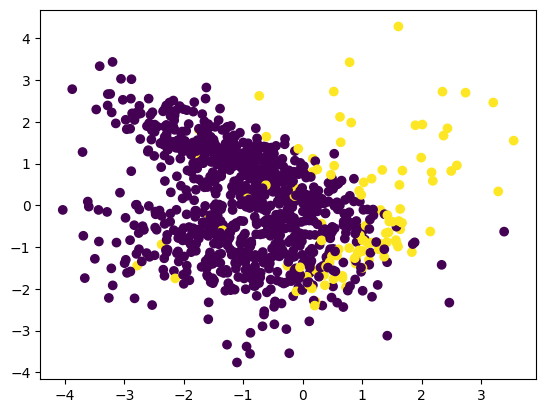

In [88]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [89]:
oversample = SMOTE()

In [91]:
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [92]:
df1 = pd.DataFrame(x)

In [93]:
df2 = pd.DataFrame(y)

In [96]:
df_smote = pd.concat([df1,df2], axis=1)

In [97]:
df_smote

,f1,f2,target
0,-0.495008,1.318597,0
1,-0.530997,0.901182,0
2,0.982776,-1.591112,0
3,-1.032039,-0.801162,0
4,-2.878650,3.017104,0
...,...,...,...
1781,0.747732,1.794627,1
1782,0.684580,-1.070641,1
1783,2.029081,0.800494,1
1784,0.360647,1.026891,1


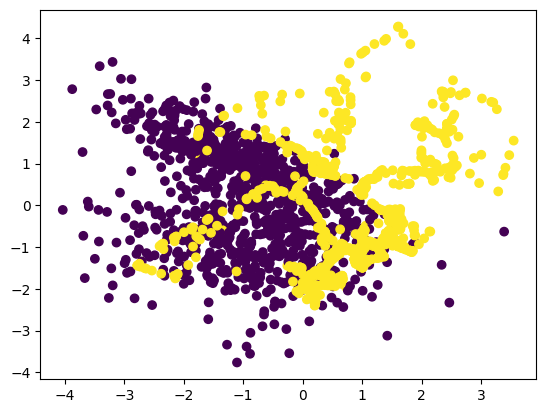

In [98]:
plt.scatter(df_smote['f1'], df_smote['f2'], c=df_smote['target'])

In [1]:
# 14 jan 2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)

In [11]:
no_sample = 1000
class_0_ratio = 0.9
class_1_ratio = 0.1


In [14]:
no_class_1 = int(no_sample * class_1_ratio)

In [15]:
no_class_1

100

In [16]:
no_class_0 = int(no_sample*class_0_ratio)

In [17]:
no_class_0

900

In [19]:
np.random.normal(0,1,no_class_0)

array([-1.26645989e-02, -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,
        7.42044161e-01, -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,
        1.69245460e+00,  5.08077548e-02, -6.36995647e-01,  1.90915485e-01,
        2.10025514e+00,  1.20158952e-01,  6.17203110e-01,  3.00170320e-01,
       -3.52249846e-01, -1.14251820e+00, -3.49342722e-01, -2.08894233e-01,
        5.86623191e-01,  8.38983414e-01,  9.31102081e-01,  2.85587325e-01,
        8.85141164e-01, -7.54397941e-01,  1.25286816e+00,  5.12929820e-01,
       -2.98092835e-01,  4.88518147e-01, -7.55717130e-02,  1.13162939e+00,
        1.51981682e+00,  2.18557541e+00, -1.39649634e+00, -1.44411381e+00,
       -5.04465863e-01,  1.60037069e-01,  8.76168921e-01,  3.15634947e-01,
       -2.02220122e+00, -3.06204013e-01,  8.27974643e-01,  2.30094735e-01,
        7.62011180e-01, -2.22328143e-01, -2.00758069e-01,  1.86561391e-01,
        4.10051647e-01,  1.98299720e-01,  1.19008646e-01, -6.70662286e-01,
        3.77563786e-01,  

In [21]:
class_0 = {
    'feature1':np.random.normal(0,1,no_class_0),
    'feature2':np.random.normal(0,1,no_class_0),
    'target':[0]*no_class_0
}

In [23]:
class_0

{'feature1': array([ 2.80229156e-01,  1.09330663e+00, -7.46224275e-01,  9.06261413e-01,
         1.46662474e+00, -1.42590292e-01,  2.65930144e-01,  2.25189434e-01,
         5.35670589e-01,  3.87921115e-01,  1.46948771e+00,  5.13364936e-01,
         8.64501704e-01,  3.31526731e-01, -1.04177028e+00,  4.33360352e-01,
        -2.29956023e-01, -6.35087419e-01, -8.94370644e-01, -7.03970806e-02,
        -6.07464102e-01,  2.03967227e+00,  1.59677190e+00, -2.66930296e-01,
         7.09157172e-01,  1.15696250e+00, -1.72839372e-01,  1.84823337e+00,
         9.22110368e-01, -1.01709114e-01, -1.79929913e+00, -9.65955208e-01,
         3.18692543e-01, -4.38263949e-01, -2.07532616e-02, -7.87313542e-01,
         2.46922731e-01, -4.58302038e-01, -1.55270587e+00, -3.41643251e-01,
        -5.72025887e-01, -1.55165764e+00,  1.42317719e+00, -7.60509662e-02,
        -3.26866079e-01,  7.50374811e-01, -8.25952390e-02,  7.67293626e-01,
        -1.48065462e+00, -1.03665587e+00,  5.45227591e-01,  1.49189736e+00,


In [24]:
class_0 = pd.DataFrame(class_0)

In [26]:
class_0

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
895,1.494769,-0.879264,0
896,-0.097286,-0.638848,0
897,-1.624359,0.855587,0
898,-0.843117,1.955754,0


In [36]:
class_1 = {
    'feature1':np.random.normal(3,1,no_class_1),
    'feature2':np.random.normal(3,1,no_class_1),
    'target':[1]*no_class_1
}

In [37]:
class_1

{'feature1': array([1.61446089, 2.71157938, 2.67064003, 3.89368049, 2.69092713,
        2.71990451, 2.21316409, 2.63306231, 2.44122726, 4.81397459,
        2.14278527, 1.8495799 , 2.37642174, 4.08811053, 1.06023619,
        4.39236652, 2.0696864 , 2.00601888, 1.67029218, 3.44717527,
        2.30387215, 3.15831902, 3.01270477, 0.58411226, 2.90889901,
        3.37985528, 1.71245172, 1.65694131, 2.90663892, 4.5593456 ,
        4.4305897 , 4.71052975, 2.12767683, 3.55401517, 2.46080111,
        3.69163601, 2.90766273, 1.14593974, 3.56873355, 0.92213995,
        5.34761591, 5.70612492, 2.34863847, 2.95029058, 3.07978951,
        3.36792269, 3.59173419, 1.34633011, 1.96955402, 3.84086106,
        3.45002586, 2.34016063, 1.67607739, 3.36384694, 2.5809149 ,
        3.98435172, 4.06559062, 3.70165443, 3.32010118, 3.28887841,
        3.88259776, 2.27003479, 1.40878362, 3.59518926, 3.27333379,
        3.29811228, 2.86736343, 0.74892345, 5.89359255, 5.74215521,
        2.48978204, 3.83335116, 3.08

In [38]:
class_1 = pd.DataFrame(class_1)

In [39]:
class_1

,feature1,feature2,target
0,1.614461,2.168464,1
1,2.711579,2.032502,1
2,2.670640,2.134272,1
3,3.893680,2.129550,1
4,2.690927,1.961466,1
...,...,...,...
95,3.120607,2.087200,1
96,2.825585,3.005987,1
97,3.499442,2.699660,1
98,4.388842,2.942988,1


In [40]:
class_1.head()

,feature1,feature2,target
0,1.614461,2.168464,1
1,2.711579,2.032502,1
2,2.670640,2.134272,1
3,3.893680,2.129550,1
4,2.690927,1.961466,1


In [41]:
class_0.head()

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0


In [42]:
df = pd.concat([class_0, class_1],axis=0)

In [43]:
df

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
95,3.120607,2.087200,1
96,2.825585,3.005987,1
97,3.499442,2.699660,1
98,4.388842,2.942988,1


In [44]:
df = df.reset_index(drop=True)

In [45]:
df

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
995,3.120607,2.087200,1
996,2.825585,3.005987,1
997,3.499442,2.699660,1
998,4.388842,2.942988,1


In [47]:
df['target'].nunique()

2

In [48]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [52]:
df['target']==0

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: target, Length: 1000, dtype: bool

In [53]:
df[df['target']==0]

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
895,1.494769,-0.879264,0
896,-0.097286,-0.638848,0
897,-1.624359,0.855587,0
898,-0.843117,1.955754,0


In [54]:
df_majority = df[df['target']==0]

In [55]:
df_majority

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
895,1.494769,-0.879264,0
896,-0.097286,-0.638848,0
897,-1.624359,0.855587,0
898,-0.843117,1.955754,0


In [56]:
df_minority = df[df['target']==1]

In [57]:
df_minority

,feature1,feature2,target
900,1.614461,2.168464,1
901,2.711579,2.032502,1
902,2.670640,2.134272,1
903,3.893680,2.129550,1
904,2.690927,1.961466,1
...,...,...,...
995,3.120607,2.087200,1
996,2.825585,3.005987,1
997,3.499442,2.699660,1
998,4.388842,2.942988,1


In [58]:
# UP SAMPLING

In [59]:
from sklearn.utils import resample

In [69]:
df_minority_upsampled = resample(df_minority,replace=True, n_samples=len(df_majority),random_state=1)

In [70]:
df_minority_upsampled

,feature1,feature2,target
937,1.145940,2.472038,1
912,2.376422,5.003272,1
972,3.088922,4.490290,1
909,4.813975,5.478005,1
975,4.073503,3.270786,1
...,...,...,...
936,2.907663,3.202187,1
998,4.388842,2.942988,1
901,2.711579,2.032502,1
932,2.127677,3.805144,1


In [72]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled],axis=0)

In [73]:
df_upsampled

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
936,2.907663,3.202187,1
998,4.388842,2.942988,1
901,2.711579,2.032502,1
932,2.127677,3.805144,1


In [74]:
df_upsampled.reset_index(drop=True, inplace=True)

In [75]:
df_upsampled

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
1795,2.907663,3.202187,1
1796,4.388842,2.942988,1
1797,2.711579,2.032502,1
1798,2.127677,3.805144,1


In [77]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [78]:
# disadv = noise in data, no pattern introduced

In [79]:
df

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
995,3.120607,2.087200,1
996,2.825585,3.005987,1
997,3.499442,2.699660,1
998,4.388842,2.942988,1


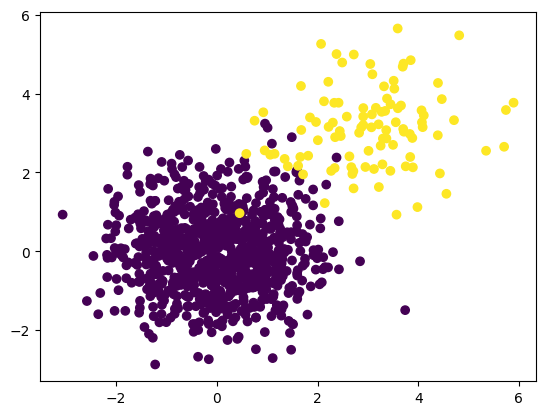

In [81]:
plt.scatter(df['feature1'], df['feature2'], c=df['target'])

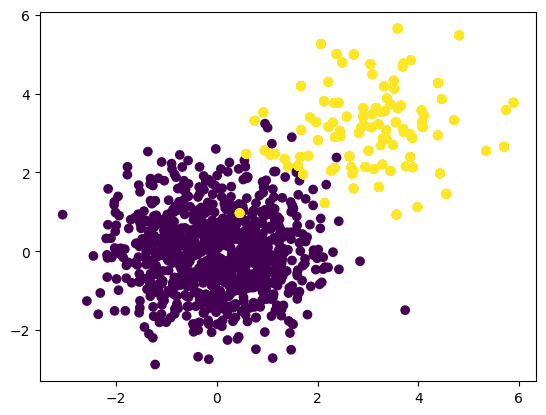

In [83]:
plt.scatter(df_upsampled['feature1'], df_upsampled['feature2'], c=df_upsampled['target'])

In [84]:
# here in above graph there is no pattern introduced and since points are repeated so they are
# getting plotted on the same point again and again so no pattern in introduced
# that's why the above two graphs are same

In [86]:
# DOWN SAMPLING >> majority class is down sampled

In [87]:
df_minority

,feature1,feature2,target
900,1.614461,2.168464,1
901,2.711579,2.032502,1
902,2.670640,2.134272,1
903,3.893680,2.129550,1
904,2.690927,1.961466,1
...,...,...,...
995,3.120607,2.087200,1
996,2.825585,3.005987,1
997,3.499442,2.699660,1
998,4.388842,2.942988,1


In [88]:
df_majority

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
895,1.494769,-0.879264,0
896,-0.097286,-0.638848,0
897,-1.624359,0.855587,0
898,-0.843117,1.955754,0


In [93]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minority), random_state = 1)

In [95]:
df_majority_downsampled

,feature1,feature2,target
860,-1.322762,-1.140488,0
880,0.524851,-0.509537,0
874,1.750722,-0.189790,0
780,-0.344974,0.888690,0
525,0.066393,-0.248319,0
...,...,...,...
494,0.253314,0.213769,0
255,0.260827,0.684819,0
672,-1.271874,0.701133,0
481,1.204128,-0.873489,0


In [97]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled], axis=0)

In [98]:
df_downsampled

,feature1,feature2,target
900,1.614461,2.168464,1
901,2.711579,2.032502,1
902,2.670640,2.134272,1
903,3.893680,2.129550,1
904,2.690927,1.961466,1
...,...,...,...
494,0.253314,0.213769,0
255,0.260827,0.684819,0
672,-1.271874,0.701133,0
481,1.204128,-0.873489,0


In [99]:
df_downsampled.reset_index(drop=True, inplace=True)

In [100]:
df_downsampled

,feature1,feature2,target
0,1.614461,2.168464,1
1,2.711579,2.032502,1
2,2.670640,2.134272,1
3,3.893680,2.129550,1
4,2.690927,1.961466,1
...,...,...,...
195,0.253314,0.213769,0
196,0.260827,0.684819,0
197,-1.271874,0.701133,0
198,1.204128,-0.873489,0


In [102]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

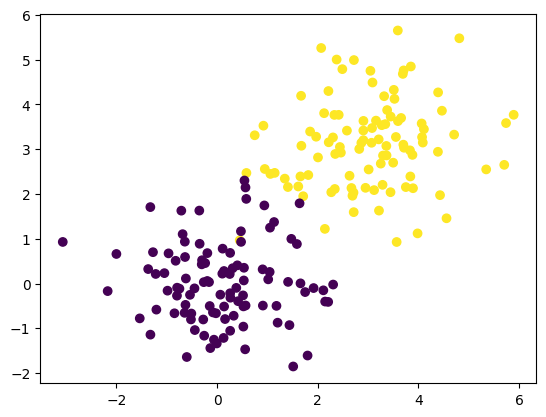

In [104]:
plt.scatter(df_downsampled['feature1'],df_downsampled['feature2'],c=df_downsampled['target'])

In [105]:
# disadv of down sampling >> data loss

In [106]:
# SMOTE

In [108]:
from sklearn.datasets import make_classification

In [112]:
x,y = make_classification(n_samples=1000, n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.9],random_state=1)

In [113]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [114]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [116]:
df1 = pd.DataFrame(x, columns=['f1','f2'])

In [117]:
df1

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [118]:
df2 = pd.DataFrame(y, columns=['target'])

In [119]:
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [122]:
final_df = pd.concat([df1,df2], axis=1)

In [123]:
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [125]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

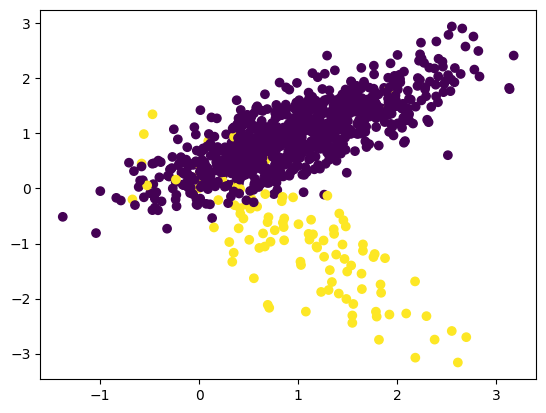

In [126]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [127]:
# pip install imblearn

In [128]:
from imblearn.over_sampling import SMOTE

In [129]:
oversample = SMOTE()

In [131]:
oversample        # object

SMOTE()

In [133]:
x,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [134]:
x

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.836616,-0.224154
1784,1.030408,-1.967845
1785,2.313533,-2.404059
1786,0.859880,-0.572142


In [135]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32

In [137]:
df1 = pd.DataFrame(x, columns=['f1','f2'])

In [138]:
df2 = pd.DataFrame(y,columns=['target'])

In [139]:
smote_df = pd.concat([df1, df2], axis=1)

In [140]:
smote_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.836616,-0.224154,1
1784,1.030408,-1.967845,1
1785,2.313533,-2.404059,1
1786,0.859880,-0.572142,1


In [141]:
smote_df['target'].value_counts()

target
1    894
0    894
Name: count, dtype: int64

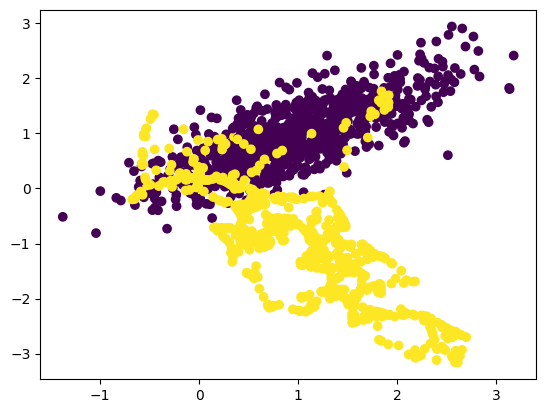

In [142]:
plt.scatter(smote_df['f1'], smote_df['f2'], c=smote_df['target'])

In [152]:
x1,y1 = oversample.fit_resample(df[['feature1','feature2']],df['target'])

In [154]:
x1

,feature1,feature2
0,0.280229,1.381499
1,1.093307,2.729462
2,-0.746224,-0.114157
3,0.906261,0.318017
4,1.466625,1.250112
...,...,...
1795,2.888672,3.156791
1796,0.808916,2.432955
1797,3.621402,3.195381
1798,1.973025,3.235541


In [155]:
type(x1)

pandas.core.frame.DataFrame

In [156]:
type(y1)

pandas.core.series.Series

In [157]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [159]:
y1 = pd.DataFrame(y, columns=['target'])

In [160]:
y1

,target
0,0
1,0
2,0
3,0
4,0
...,...
1795,1
1796,1
1797,1
1798,1


In [161]:
df_smote_prev = pd.concat([x1, y1], axis=1)

In [162]:
df_smote_prev

,feature1,feature2,target
0,0.280229,1.381499,0
1,1.093307,2.729462,0
2,-0.746224,-0.114157,0
3,0.906261,0.318017,0
4,1.466625,1.250112,0
...,...,...,...
1795,2.888672,3.156791,1
1796,0.808916,2.432955,1
1797,3.621402,3.195381,1
1798,1.973025,3.235541,1


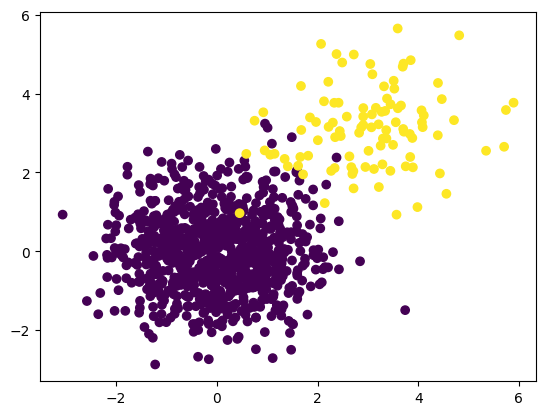

In [163]:
plt.scatter(df['feature1'], df['feature2'], c=df['target'])

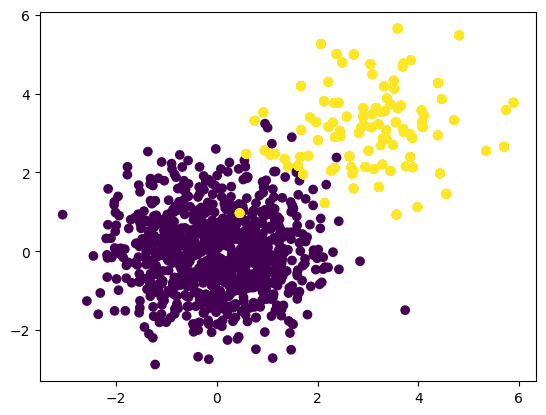

In [165]:
plt.scatter(df_upsampled['feature1'], df_upsampled['feature2'], c=df_upsampled['target'])

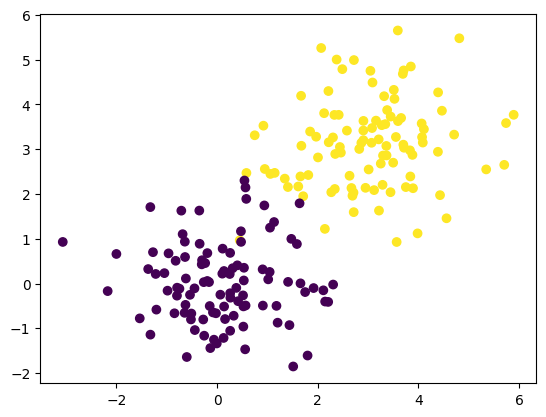

In [166]:
plt.scatter(df_downsampled['feature1'], df_downsampled['feature2'], c=df_downsampled['target'])

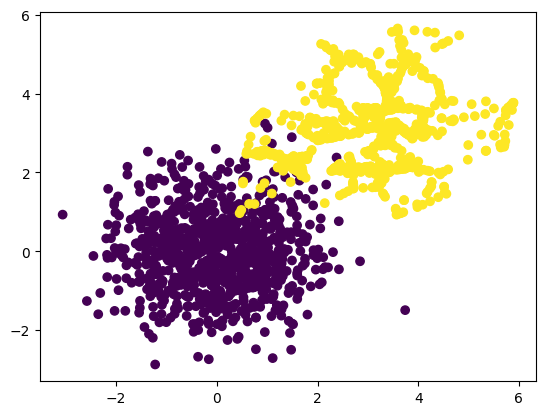

In [167]:
plt.scatter(df_smote_prev['feature1'], df_smote_prev['feature2'], c=df_smote_prev['target'])